In [8]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')


# import numpy as np, h5py
# import scipy.io

# import numpy as np, h5py


import scipy.io
import hdf5storage  as hdf5

# # import augmentation
# # first set of experiments had 412:
# np.random.seed(412)
# np.random.seed(105)
set_nb_theme('monokai')

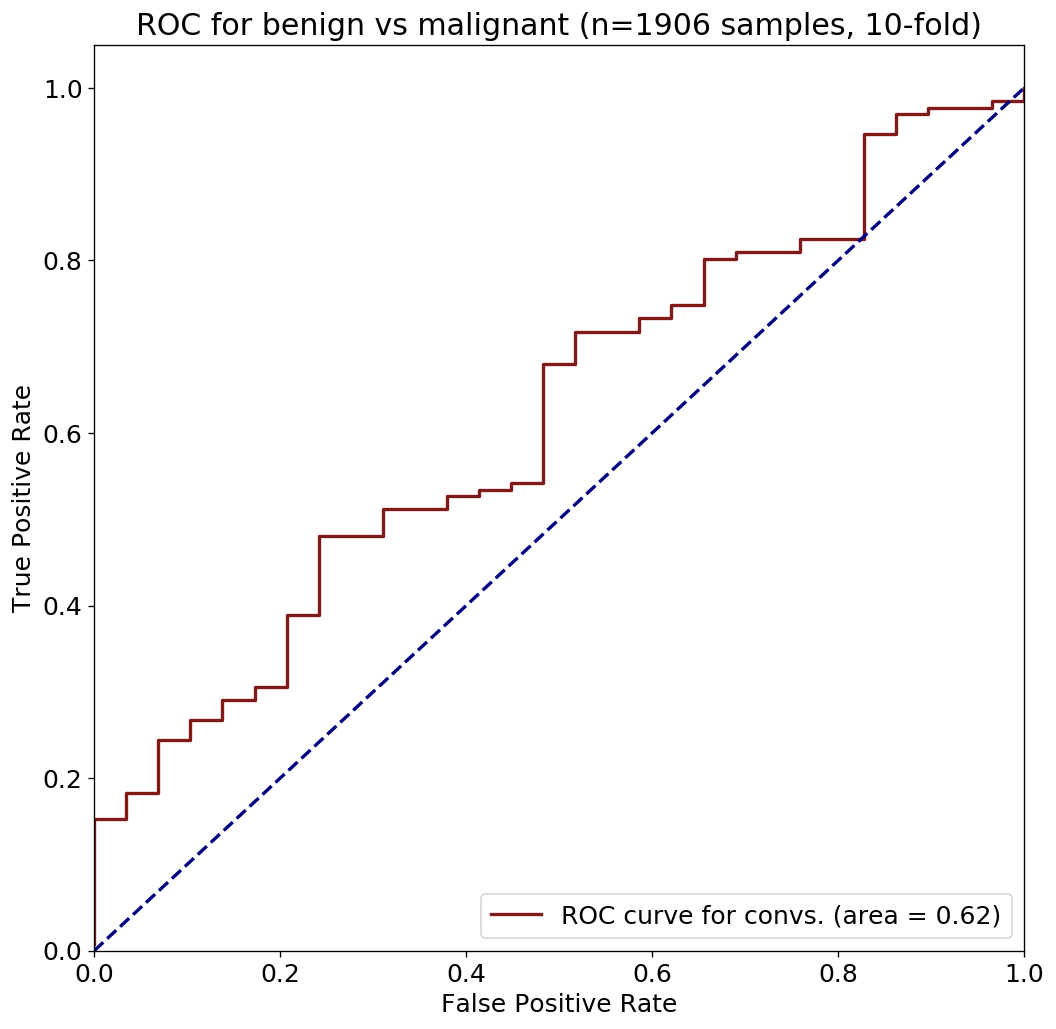

In [29]:
import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

import scipy.io


import scipy.io
mat = scipy.io.loadmat('10fold_accsTrue.mat')
# mat = scipy.io.loadmat('10fold_accsFalse.mat')

x = mat
x.keys()

plt.rcParams.update({'font.size': 15})

fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='k')


colors = ['darkorange']
i = 1
preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
labels_tot = x['labels_kfold'+str(i)].squeeze() 

fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color=[0.5, i/10., i/10. ],
         lw=lw, label='ROC curve for convs. (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for benign vs malignant (n=1906 samples, 10-fold)')
plt.legend(loc="lower right")

plt.show()


In [ ]:
plt.rcParams.update({'font.size': 15})

fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='k')


colors = ['darkorange']

for i in range(9):
    preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = x['labels_kfold'+str(i)].squeeze() 

    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    plt.plot(fpr, tpr, color=[0.3, 0.3, i/10. ],
             lw=lw, label='(AUC = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#     plt.title('')
    plt.legend(loc="lower right")

plt.show()

In [ ]:
mat = scipy.io.loadmat('10fold_accsTrue.mat')
x = mat
x.keys()

plt.rcParams.update({'font.size': 15})

fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='k')


colors = ['darkorange']

aucs_=[]
for i in range(10):
    preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = x['labels_kfold'+str(i)].squeeze() 

    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    plt.plot(fpr, tpr, color=[0.3, 0.3, i/10. ],
             lw=lw, label='(AUC = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#     plt.title('')
    plt.legend(loc="lower right")
    aucs_.append(roc_auc)

plt.show()

aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)

In [ ]:
mat = scipy.io.loadmat('10fold_accsFalse.mat')
x = mat
x.keys()

plt.rcParams.update({'font.size': 15})

fig=plt.figure(figsize=(10, 10), dpi= 120, facecolor='w', edgecolor='k')


colors = ['darkorange']

aucs_=[]
for i in range(10):
    preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = x['labels_kfold'+str(i)].squeeze() 

    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    plt.plot(fpr, tpr, color=[0.3, 0.3, i/10. ],
             lw=lw, label='(AUC = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#     plt.title('')
    plt.legend(loc="lower right")
    aucs_.append(roc_auc)

plt.show()

aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)

In [ ]:
x = scipy.io.loadmat('10fold_accsTrue.mat')
y = scipy.io.loadmat('10fold_accsFalse.mat')
 
z1 = scipy.io.loadmat('stanford_pretrain/10fold_accsFalse.mat')
z2 = scipy.io.loadmat('moffitt_pretrain/10fold_accsFalse.mat')
z3 = scipy.io.loadmat('maastro_pretrain/10fold_accsFalse.mat')


from scipy import interp

plt.rcParams.update({'font.size': 15})
fig=plt.figure(figsize=(8, 8), dpi= 120, facecolor='w', edgecolor='k')


colors = ['darkorange']
fprs = []
tprs = []
aucs_=[]
# base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = y['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = y['labels_kfold'+str(i)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
std *= 0.5
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'm--',  label='no pretraining')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='m', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)





fprs = []
tprs = []
aucs_=[]
base_fpr = np.linspace(0, 1, 100)
for i in range(9):
    preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = x['labels_kfold'+str(i)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b',  label='pretrained on all three survival')
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='b', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)









fprs = []
tprs = []
aucs_=[]
# base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = z1['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = z1['labels_kfold'+str(i)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'c',  label='pretrained on Moffitt and Maastro')
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='c', alpha=0.1)

aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)



fprs = []
tprs = []
aucs_=[]
# base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = z2['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = z2['labels_kfold'+str(i)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
# plt.plot(base_fpr, mean_tprs, 'k',  label='pretrained on Moffitt and Stanford')
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='k', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)






fprs = []
tprs = []
aucs_=[] 
for i in range(9):
    preds_tot = z3['logits_kfold'+str(i)].squeeze()[:,1]
    labels_tot = z3['labels_kfold'+str(i)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
# plt.plot(base_fpr, mean_tprs, 'k')
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='k', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)




plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# Now add the legend with some customizations.
# legend = ax.legend(loc='upper center')

plt.legend()
    
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')
plt.show()